# Import Libraries

In [ ]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from nltk.util import ngrams
import numpy as np
import pandas as pd
import re
import os

# Load Dataset & Pre-Process

In [ ]:
df = pd.read_csv('archive-5/final-articles.csv')

In [ ]:
df.head(10)

,link,author,title,content,publish-time,source
0,https://www.goal.com/en/news/explained-how-che...,Nizaar Kinsella,Explained: How Chelsea are affected by Abramov...,Roman Abramovich has been sanctioned by the Un...,Publish Time Not Found,Goal.com
1,https://www.goal.com/en/news/adidas-limited-ed...,Nick Khairi,Would you wear these in Sunday League? Adidas ...,"As ever, Adidas have been brave and bold in th...",Publish Time Not Found,Goal.com
2,https://www.goal.com/en/news/chelsea-owner-abr...,Andrew Steel,Chelsea owner Abramovich 'terrified of sanctio...,"Roman Abramovich is ""terrified"" of facing sanc...",Publish Time Not Found,Goal.com
3,https://www.goal.com/en/news/weekly-team-picks...,GOAL,Everything we've got on our radar this week: T...,"Here at GOAL, our team of writers, editors and...",Publish Time Not Found,Goal.com
4,https://www.goal.com/en/news/mwepu-prays-for-i...,Dennis Mabuka,Mwepu prays for injury-free season with Bright...,Zambia international Enock Mwepu is hoping to ...,Publish Time Not Found,Goal.com
5,https://www.goal.com/en/news/women-euros-swede...,Ameé Ruszkai,'We know how good we are' - Will Sweden end En...,"Magdalena Eriksson, the Sweden defender and Ch...",Publish Time Not Found,Goal.com
6,https://www.goal.com/en/news/tuchel-mainz-boss...,Ryan Tolmich,'Tuchel opened my eyes' - Mainz boss Svensson ...,Mainz coach Bo Svensson has explained how Thom...,Publish Time Not Found,Goal.com
7,https://www.goal.com/en/news/haaland-tear-grea...,Chris Burton,Haaland tipped to tear ‘great’ Premier League ...,Erling Haaland is ready to tear “a lot of grea...,Publish Time Not Found,Goal.com
8,https://www.goal.com/en/news/liverpool-s-fabin...,Neil Jones,Liverpool's Fabinho: Luis Diaz didn't believe ...,Fabinho has revealed how a conversation with L...,Publish Time Not Found,Goal.com
9,https://www.goal.com/en/news/robertson-scary-w...,Andrew Steel,Robertson fires 'scary' warning to Premier Lea...,Andy Robertson has warned Liverpool's Premier ...,Publish Time Not Found,Goal.com


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11963 entries, 0 to 11962
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          11963 non-null  object
 1   author        11145 non-null  object
 2   title         11960 non-null  object
 3   content       11960 non-null  object
 4   publish-time  11950 non-null  object
 5   source        11869 non-null  object
dtypes: object(6)
memory usage: 560.9+ KB


In [ ]:
df.describe()

,link,author,title,content,publish-time,source
count,11963,11145,11960,11960,11950,11869
unique,11953,352,11907,11947,3403,461
top,https://theanalyst.com/eu/2022/08/premier-leag...,Chris Burton,Five Knee-Jerk Reactions to the Premier League...,Aliou Cisse is unwilling to accept that Senega...,Publish Time Not Found,Goal.com
freq,2,916,6,2,7483,7483


In [ ]:
df['content'] = df['content'].astype(str)

In [ ]:
df.head(10)

,link,author,title,content,publish-time,source
0,https://www.goal.com/en/news/explained-how-che...,Nizaar Kinsella,Explained: How Chelsea are affected by Abramov...,Roman Abramovich has been sanctioned by the Un...,Publish Time Not Found,Goal.com
1,https://www.goal.com/en/news/adidas-limited-ed...,Nick Khairi,Would you wear these in Sunday League? Adidas ...,"As ever, Adidas have been brave and bold in th...",Publish Time Not Found,Goal.com
2,https://www.goal.com/en/news/chelsea-owner-abr...,Andrew Steel,Chelsea owner Abramovich 'terrified of sanctio...,"Roman Abramovich is ""terrified"" of facing sanc...",Publish Time Not Found,Goal.com
3,https://www.goal.com/en/news/weekly-team-picks...,GOAL,Everything we've got on our radar this week: T...,"Here at GOAL, our team of writers, editors and...",Publish Time Not Found,Goal.com
4,https://www.goal.com/en/news/mwepu-prays-for-i...,Dennis Mabuka,Mwepu prays for injury-free season with Bright...,Zambia international Enock Mwepu is hoping to ...,Publish Time Not Found,Goal.com
5,https://www.goal.com/en/news/women-euros-swede...,Ameé Ruszkai,'We know how good we are' - Will Sweden end En...,"Magdalena Eriksson, the Sweden defender and Ch...",Publish Time Not Found,Goal.com
6,https://www.goal.com/en/news/tuchel-mainz-boss...,Ryan Tolmich,'Tuchel opened my eyes' - Mainz boss Svensson ...,Mainz coach Bo Svensson has explained how Thom...,Publish Time Not Found,Goal.com
7,https://www.goal.com/en/news/haaland-tear-grea...,Chris Burton,Haaland tipped to tear ‘great’ Premier League ...,Erling Haaland is ready to tear “a lot of grea...,Publish Time Not Found,Goal.com
8,https://www.goal.com/en/news/liverpool-s-fabin...,Neil Jones,Liverpool's Fabinho: Luis Diaz didn't believe ...,Fabinho has revealed how a conversation with L...,Publish Time Not Found,Goal.com
9,https://www.goal.com/en/news/robertson-scary-w...,Andrew Steel,Robertson fires 'scary' warning to Premier Lea...,Andy Robertson has warned Liverpool's Premier ...,Publish Time Not Found,Goal.com


In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.drop(columns=['link', 'author', 'publish-time', 'source'])

In [ ]:
df1.head()

,title,content
0,Explained: How Chelsea are affected by Abramov...,Roman Abramovich has been sanctioned by the Un...
1,Would you wear these in Sunday League? Adidas ...,"As ever, Adidas have been brave and bold in th..."
2,Chelsea owner Abramovich 'terrified of sanctio...,"Roman Abramovich is ""terrified"" of facing sanc..."
3,Everything we've got on our radar this week: T...,"Here at GOAL, our team of writers, editors and..."
4,Mwepu prays for injury-free season with Bright...,Zambia international Enock Mwepu is hoping to ...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11963 entries, 0 to 11962
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    11960 non-null  object
 1   content  11963 non-null  object
dtypes: object(2)
memory usage: 187.1+ KB


In [ ]:
string = "Join GOAL for a live stream watchalong of the 2022 World Cup draw."
df1 = df1[df1['content'] != string]

**Remove the Noise**

In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove Twitter handles (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove Twitter hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Remove strings like "pictwittercom"
    text = re.sub(r'pictwittercom \w+', '', text)

    # Remove any standalone alphanumeric strings
    text = re.sub(r'\b[\w]{10,}\b', '', text)

    # Remove any special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text


def to_lowercase(text):
    return text.lower()

In [ ]:
def cleaner(text):
    text = re.sub(r'enjoy this subscribe to our new football to receive exclusive weekly content you should also follow our social accounts over on x instagram tiktok and facebook', '', text)

    return text

In [ ]:
def clean_match(text):
    text = re.sub(r'match event for.*', '', text, flags=re.DOTALL)

    return text

In [ ]:
def clean_more(text):
    text = re.sub(r'\s*more to follow\s*', ' ', text, flags=re.IGNORECASE)
    text = text.strip()

    return text

In [ ]:
def clean_tribuna(text):
    text = re.sub(r'enjoy this subscribe to our mailing list\s*' , '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
def clean_repetitive(text):
    text = re.sub(r'(loading\s+)+', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(\w+)\s+\1+\b', r'\1', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
def clean_about(text):
    text = re.sub(r'what do you think let us know in the comments\s*' , '', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
nltk_data_path = "/tmp/nltk_data"
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)
nltk.data.path.append(nltk_data_path)

In [ ]:
nltk.download('wordnet', download_dir=nltk_data_path)

[nltk_data] Downloading package wordnet to /tmp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('punkt', download_dir=nltk_data_path)

[nltk_data] Downloading package punkt to /tmp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords', download_dir=nltk_data_path)

[nltk_data] Downloading package stopwords to /tmp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_path)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /tmp/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Normalization**

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def stem_and_remove_stopwords(text, stop_words):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    return ' '.join(stemmed_tokens)

def lemmatize_and_remove_stopwords(text, stop_words):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
    return ' '.join(lemmatized_tokens)

**Applying the noise removal & normalization on the 'content' column**

In [ ]:
df1['content'] = df1['content'].apply(clean_text)
df1['content'] = df1['content'].apply(to_lowercase)
df1['content'] = df1['content'].apply(cleaner)
df1['content'] = df1['content'].apply(clean_match)
df1['content'] = df1['content'].apply(clean_more)
df1['content'] = df1['content'].apply(clean_tribuna)

In [ ]:
pattern = r'(?i)follow\s+nxgn\s+on\s+(Instagram\s+and\s+)?(tiktok\s+)?'
df1['content'] = df1['content'].str.replace(pattern, '', regex=True)

pattern2 = r'(?i)to\s+receive\s+exclusive\s+weekly\s+content(\s+and\s+follow\s+us\s+on\s+twitter\s+too\s*)?'
df1['content'] = df1['content'].str.replace(pattern2, '', regex=True)

pattern3 = r'(?i)enjoy\s+this\s+subscribe\s+to\s+our\s+to\s+receive\s+exclusive\s+stories\s+each\s+friday\s+it\s+s\s+free\s+and\s+follow\s+us\s+on\s+Twitter\s+too\s*$'
df1['content'] = df1['content'].str.replace(pattern3, '', regex=True)

In [ ]:
df1['content'] = df1['content'].apply(clean_repetitive)
df1['content'] = df1['content'].apply(clean_about)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11962 entries, 0 to 11962
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    11959 non-null  object
 1   content  11962 non-null  object
dtypes: object(2)
memory usage: 280.4+ KB


In [ ]:
print(df1['content'][1998])

kylian mbappe has been spotted posing for pictures with paris saint germain team mate neymar and former player david beckham in qatar as the france forward s decision on his future draws near the attacker is in the gulf state with the ligue 1 outfit as part of their end of season schedule despite that his days with the parc des princes outfit are numbered ahead of a switch to real madrid mbappe who revealed his future would be announced before he begins france duty next month was all smiles with neymar another psg player linked with a move and england legend beckham himself a former blancos star in a post on instagram on tuesday the striker showed a snap of him neymar and beckham smiling together in the nation s capital of doha a secondary shot showed him beckham and team mate achraf hakimi laughing together in a stadium mbappe did not elaborate in his comments on the picture merely including the national flag of qatar alongside psg s red and blue club colours the story of mbappe s nex

In [ ]:
stemmed = df1.copy()
lemmatized = df1.copy()

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mustafa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')  # Used for POS tagging
nltk.download('stopwords')  # Used for stopwords

[nltk_data] Downloading package punkt to /Users/mustafa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mustafa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mustafa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stemmed['stemmed_content'] = stemmed['content'].apply(lambda x: stem_and_remove_stopwords(x, stop_words))

In [ ]:
print(stemmed['stemmed_content'][1998])

kylian mbapp spot pose pictur pari saint germain team mate neymar former player david beckham qatar franc forward decis futur draw near attack gulf state ligu 1 outfit part end season schedul despit day parc de princ outfit number ahead switch real madrid mbapp reveal futur would announc begin franc duti next month smile neymar anoth psg player link move england legend beckham former blanco star post instagram tuesday striker show snap neymar beckham smile togeth nation capit doha secondari shot show beckham team mate achraf hakimi laugh togeth stadium mbapp elabor comment pictur mere includ nation flag qatar alongsid psg red blue club colour stori mbapp next step biggest transfer saga season psg refus sell madrid last term head final year contract forward look set depart parc de princ move santiago bernabeu term agre player club liverpool also kept tab last gasp renew offer psg look fallen short


In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')

[nltk_data] Downloading package omw-1.4 to /Users/mustafa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mustafa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     /Users/mustafa/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


True

In [ ]:
import nltk
lemmatized['lemmatized_content'] = lemmatized['content'].apply(lambda x: lemmatize_and_remove_stopwords(x, stop_words))

In [ ]:
print(lemmatized['lemmatized_content'][1998])

kylian mbappe spotted posing picture paris saint germain team mate neymar former player david beckham qatar france forward decision future draw near attacker gulf state ligue outfit part end season schedule despite day parc de prince outfit numbered ahead switch real madrid mbappe revealed future would announced begin france duty next month smile neymar another psg player linked move england legend beckham former blancos star post instagram tuesday striker showed snap neymar beckham smiling together nation capital doha secondary shot showed beckham team mate achraf hakimi laughing together stadium mbappe elaborate comment picture merely including national flag qatar alongside psg red blue club colour story mbappe next step biggest transfer saga season psg refused sell madrid last term heading final year contract forward look set depart parc de prince move santiago bernabeu term agreed player club liverpool also kept tab last gasp renewed offer psg look fallen short


In [ ]:
df1['refined_content'] = df1['content'].apply(lambda x: lemmatize_and_remove_stopwords(x, stop_words))

In [ ]:
print(df1['refined_content'][1998])

kylian mbappe spotted posing picture paris saint germain team mate neymar former player david beckham qatar france forward decision future draw near attacker gulf state ligue outfit part end season schedule despite day parc de prince outfit numbered ahead switch real madrid mbappe revealed future would announced begin france duty next month smile neymar another psg player linked move england legend beckham former blancos star post instagram tuesday striker showed snap neymar beckham smiling together nation capital doha secondary shot showed beckham team mate achraf hakimi laughing together stadium mbappe elaborate comment picture merely including national flag qatar alongside psg red blue club colour story mbappe next step biggest transfer saga season psg refused sell madrid last term heading final year contract forward look set depart parc de prince move santiago bernabeu term agreed player club liverpool also kept tab last gasp renewed offer psg look fallen short


In [ ]:
from nltk import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/mustafa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mustafa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df1['tokens'] = df1['refined_content'].apply(word_tokenize) # tokens with no stopwords

In [ ]:
print(df1['tokens'][1998])

['kylian', 'mbappe', 'spotted', 'posing', 'picture', 'paris', 'saint', 'germain', 'team', 'mate', 'neymar', 'former', 'player', 'david', 'beckham', 'qatar', 'france', 'forward', 'decision', 'future', 'draw', 'near', 'attacker', 'gulf', 'state', 'ligue', 'outfit', 'part', 'end', 'season', 'schedule', 'despite', 'day', 'parc', 'de', 'prince', 'outfit', 'numbered', 'ahead', 'switch', 'real', 'madrid', 'mbappe', 'revealed', 'future', 'would', 'announced', 'begin', 'france', 'duty', 'next', 'month', 'smile', 'neymar', 'another', 'psg', 'player', 'linked', 'move', 'england', 'legend', 'beckham', 'former', 'blancos', 'star', 'post', 'instagram', 'tuesday', 'striker', 'showed', 'snap', 'neymar', 'beckham', 'smiling', 'together', 'nation', 'capital', 'doha', 'secondary', 'shot', 'showed', 'beckham', 'team', 'mate', 'achraf', 'hakimi', 'laughing', 'together', 'stadium', 'mbappe', 'elaborate', 'comment', 'picture', 'merely', 'including', 'national', 'flag', 'qatar', 'alongside', 'psg', 'red', 'bl

In [ ]:
!pip install wordcloud

**Word Cloud Visualization**

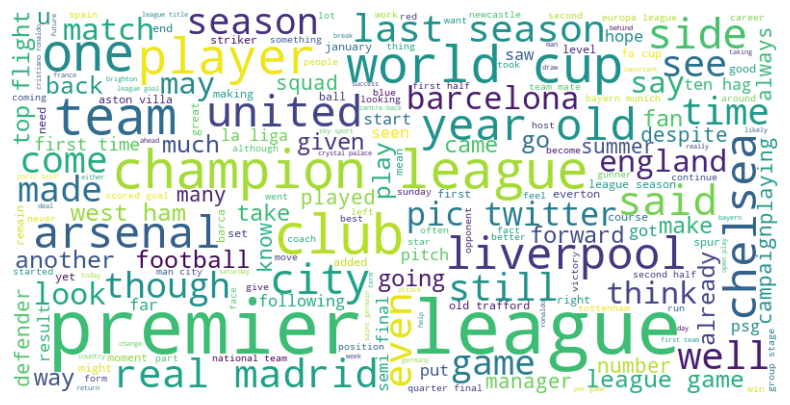

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_tokens = sum(df1['tokens'], [])
text = ' '.join(all_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


**Name Entity Recognition**

In [ ]:
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
df1['entities'] = df1['refined_content'].apply(extract_entities)

In [ ]:
print(df1['entities'][1998])

[('kylian', 'NORP'), ('paris', 'GPE'), ('david beckham', 'PERSON'), ('qatar', 'GPE'), ('france', 'GPE'), ('attacker gulf', 'LOC'), ('season', 'DATE'), ('france', 'GPE'), ('next month', 'DATE'), ('beckham', 'GPE'), ('tuesday', 'DATE'), ('neymar beckham', 'PERSON'), ('doha', 'GPE'), ('qatar', 'GPE'), ('madrid', 'GPE'), ('year', 'DATE'), ('liverpool', 'GPE')]


**Plotting most frequent entity types**

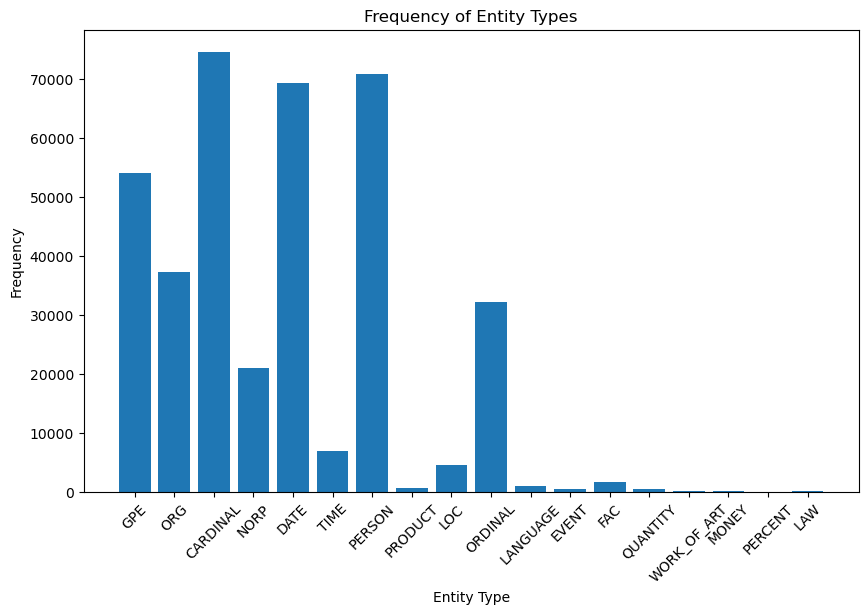

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

all_entities = sum(df1['entities'], [])
labels = [label for entity, label in all_entities]
label_freq = Counter(labels)

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(label_freq.keys(), label_freq.values())
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Frequency of Entity Types')
plt.xticks(rotation=45)
plt.show()

In [ ]:
entities = all_entities
gpe_entities = [entity for entity, tag in entities if tag == 'GPE']
person_entities = [entity for entity, tag in entities if tag == 'PERSON']

In [ ]:
gpe_freq = Counter(gpe_entities)
person_freq = Counter(person_entities)

top_gpe = gpe_freq.most_common(10)
top_person = person_freq.most_common(10)

**Plotting the top GPE & Person Entities**

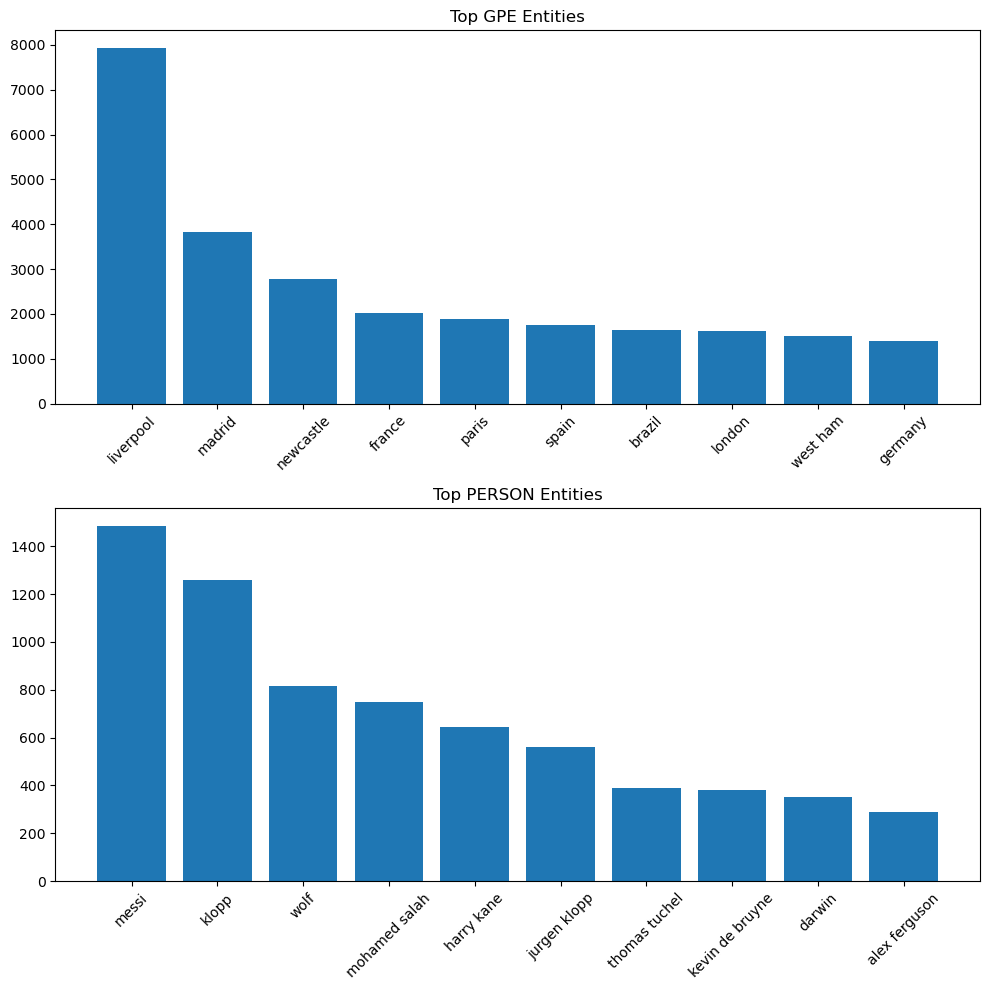

In [ ]:
def plot_top_entities(top_entities, title, ax):
    labels, counts = zip(*top_entities)
    ax.bar(labels, counts)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
plot_top_entities(top_gpe, 'Top GPE Entities', axes[0])
plot_top_entities(top_person, 'Top PERSON Entities', axes[1])

plt.tight_layout()
plt.show()

In [ ]:
from spacy import displacy

doc = nlp(df1['refined_content'].iloc[1998])
displacy.render(doc, style='ent', jupyter=True)

**N-Grams**

In [ ]:
def plot_ngrams(ngram_freq, ngram_name):
    ngram_freq = ngram_freq.most_common(10)
    ngrams, counts = zip(*ngram_freq)
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(ngrams)), counts)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.xticks(range(len(ngrams)), ngrams, rotation=45)
    plt.title(f'Top 10 {ngram_name}')
    plt.show()

In [ ]:
from nltk.util import ngrams

# n-grams
df1['unigrams'] = df1['tokens'].apply(lambda x: list(ngrams(x, 1)) if len(x) >= 1 else [])
df1['bigrams'] = df1['tokens'].apply(lambda x: list(ngrams(x, 2)) if len(x) >= 2 else [])
df1['trigrams'] = df1['tokens'].apply(lambda x: list(ngrams(x, 3)) if len(x) >= 3 else [])

In [ ]:
unigrams_freq = FreqDist([unigram for sublist in df1['unigrams'] for unigram in sublist])
bigrams_freq = FreqDist([bigram for sublist in df1['bigrams'] for bigram in sublist])
trigrams_freq = FreqDist([trigram for sublist in df1['trigrams'] for trigram in sublist])

In [ ]:
print('Unii-Grams: \n', df1['unigrams'][1998])
print('Bi-Grams: \n', df1['bigrams'][1998])
print('Tri-Grams: \n', df1['trigrams'][1998])

Unii-Grams: 
 [('kylian',), ('mbappe',), ('spotted',), ('posing',), ('picture',), ('paris',), ('saint',), ('germain',), ('team',), ('mate',), ('neymar',), ('former',), ('player',), ('david',), ('beckham',), ('qatar',), ('france',), ('forward',), ('decision',), ('future',), ('draw',), ('near',), ('attacker',), ('gulf',), ('state',), ('ligue',), ('outfit',), ('part',), ('end',), ('season',), ('schedule',), ('despite',), ('day',), ('parc',), ('de',), ('prince',), ('outfit',), ('numbered',), ('ahead',), ('switch',), ('real',), ('madrid',), ('mbappe',), ('revealed',), ('future',), ('would',), ('announced',), ('begin',), ('france',), ('duty',), ('next',), ('month',), ('smile',), ('neymar',), ('another',), ('psg',), ('player',), ('linked',), ('move',), ('england',), ('legend',), ('beckham',), ('former',), ('blancos',), ('star',), ('post',), ('instagram',), ('tuesday',), ('striker',), ('showed',), ('snap',), ('neymar',), ('beckham',), ('smiling',), ('together',), ('nation',), ('capital',), ('d

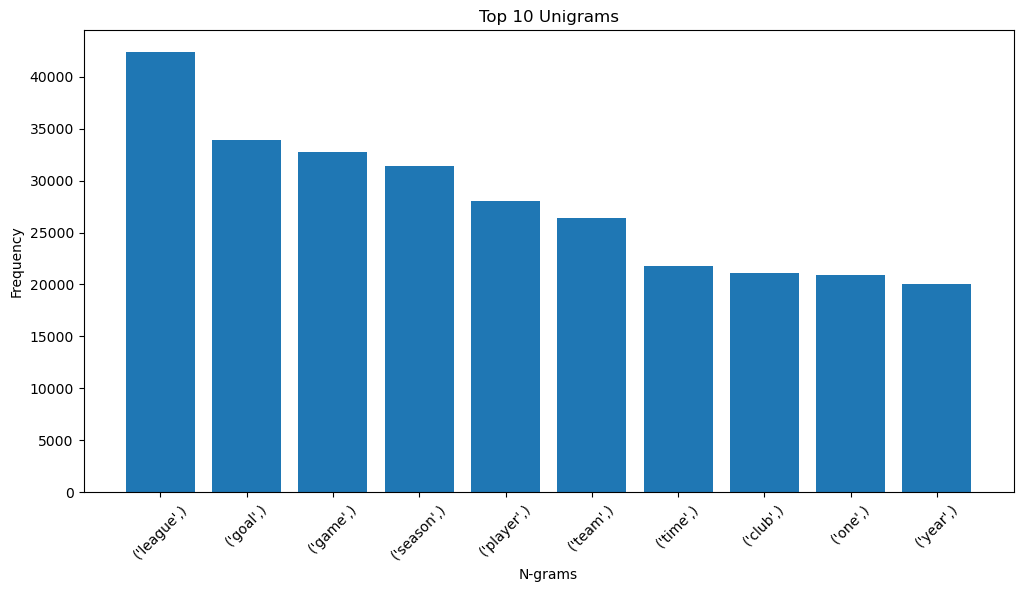

In [ ]:
plot_ngrams(unigrams_freq, 'Unigrams')

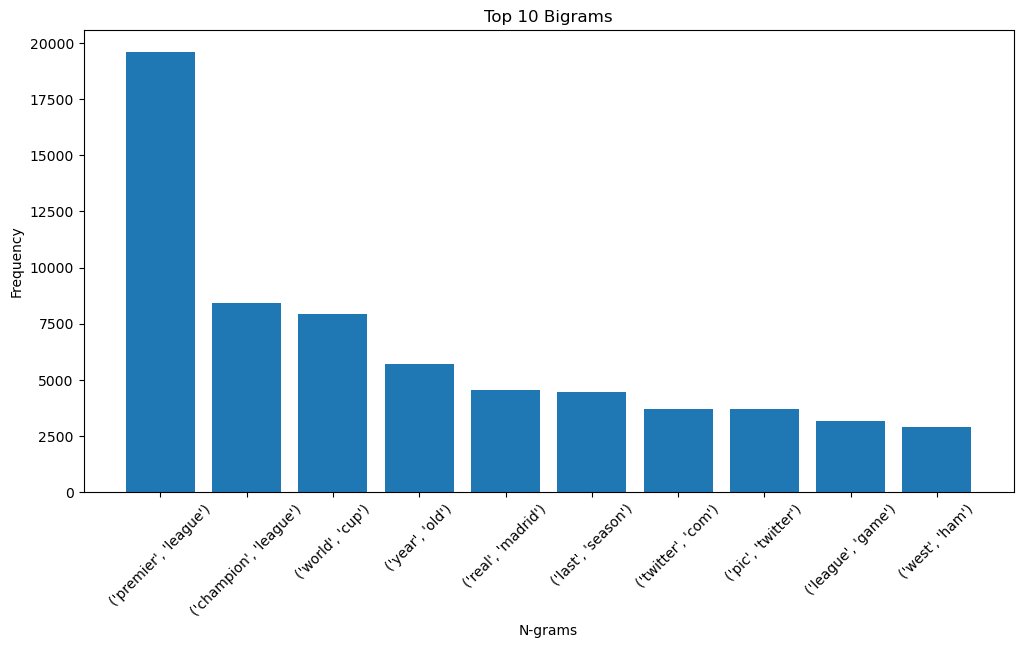

In [ ]:
plot_ngrams(bigrams_freq, 'Bigrams')

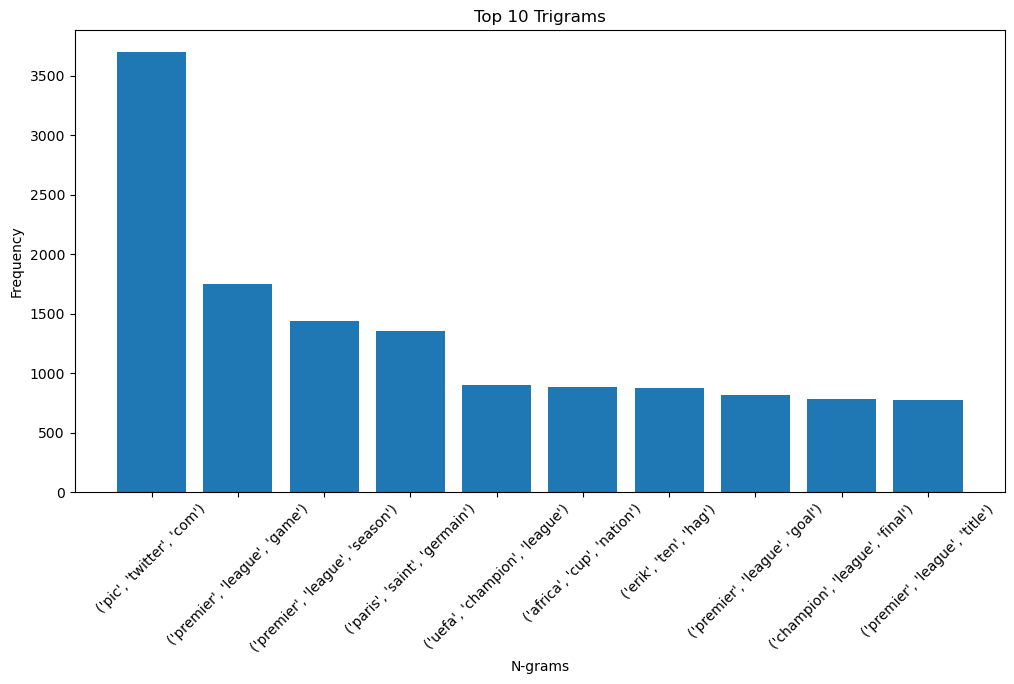

In [ ]:
plot_ngrams(trigrams_freq, 'Trigrams')

**Part of Speech (POS)**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /Users/mustafa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mustafa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/mustafa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Tokenize text into words (with stopwords)
df1['wordtokens'] = df1['content'].apply(word_tokenize)

In [ ]:
# Print sample
print(df1['wordtokens'][1998])
print(df1['content'][1998])

['kylian', 'mbappe', 'has', 'been', 'spotted', 'posing', 'for', 'pictures', 'with', 'paris', 'saint', 'germain', 'team', 'mate', 'neymar', 'and', 'former', 'player', 'david', 'beckham', 'in', 'qatar', 'as', 'the', 'france', 'forward', 's', 'decision', 'on', 'his', 'future', 'draws', 'near', 'the', 'attacker', 'is', 'in', 'the', 'gulf', 'state', 'with', 'the', 'ligue', '1', 'outfit', 'as', 'part', 'of', 'their', 'end', 'of', 'season', 'schedule', 'despite', 'that', 'his', 'days', 'with', 'the', 'parc', 'des', 'princes', 'outfit', 'are', 'numbered', 'ahead', 'of', 'a', 'switch', 'to', 'real', 'madrid', 'mbappe', 'who', 'revealed', 'his', 'future', 'would', 'be', 'announced', 'before', 'he', 'begins', 'france', 'duty', 'next', 'month', 'was', 'all', 'smiles', 'with', 'neymar', 'another', 'psg', 'player', 'linked', 'with', 'a', 'move', 'and', 'england', 'legend', 'beckham', 'himself', 'a', 'former', 'blancos', 'star', 'in', 'a', 'post', 'on', 'instagram', 'on', 'tuesday', 'the', 'striker',

In [ ]:
def tag(tokens):
    return pos_tag(tokens)

In [ ]:
df1['wordtokens'] = df1['wordtokens'].astype(str)

In [ ]:
import ast

# Convert stringified lists back to real lists
df1['wordtokens'] = df1['wordtokens'].apply(ast.literal_eval)

In [ ]:
# Apply POS tagging
df1['token_tagged'] = df1['wordtokens'].apply(tag)

In [ ]:
print("Tokenization and POS Tagging for the row 1998-:", df1['token_tagged'].iloc[1998])

Tokenization and POS Tagging for the row 1998-: [('kylian', 'JJ'), ('mbappe', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('spotted', 'VBN'), ('posing', 'VBG'), ('for', 'IN'), ('pictures', 'NNS'), ('with', 'IN'), ('paris', 'JJ'), ('saint', 'NN'), ('germain', 'NN'), ('team', 'NN'), ('mate', 'NN'), ('neymar', 'NN'), ('and', 'CC'), ('former', 'JJ'), ('player', 'NN'), ('david', 'NN'), ('beckham', 'NN'), ('in', 'IN'), ('qatar', 'NN'), ('as', 'IN'), ('the', 'DT'), ('france', 'NN'), ('forward', 'RB'), ('s', 'JJ'), ('decision', 'NN'), ('on', 'IN'), ('his', 'PRP$'), ('future', 'NN'), ('draws', 'NN'), ('near', 'IN'), ('the', 'DT'), ('attacker', 'NN'), ('is', 'VBZ'), ('in', 'IN'), ('the', 'DT'), ('gulf', 'NN'), ('state', 'NN'), ('with', 'IN'), ('the', 'DT'), ('ligue', 'NN'), ('1', 'CD'), ('outfit', 'NN'), ('as', 'IN'), ('part', 'NN'), ('of', 'IN'), ('their', 'PRP$'), ('end', 'NN'), ('of', 'IN'), ('season', 'NN'), ('schedule', 'NN'), ('despite', 'IN'), ('that', 'IN'), ('his', 'PRP$'), ('days', 'NNS'),

**TF-IDF & Bag of Word**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Bag of Words
vectorizer_bow = CountVectorizer(analyzer='word', tokenizer=lambda text: text, lowercase=False, preprocessor=None, token_pattern=None)
bow_matrix = vectorizer_bow.fit_transform(df1['refined_content'].values)

In [ ]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer(analyzer='word', tokenizer=lambda text: text, lowercase=False, preprocessor=None, token_pattern=None)
tfidf_matrix = vectorizer_tfidf.fit_transform(df1['refined_content'].values)

In [ ]:
print(df1['content'][1998])

kylian mbappe has been spotted posing for pictures with paris saint germain team mate neymar and former player david beckham in qatar as the france forward s decision on his future draws near the attacker is in the gulf state with the ligue 1 outfit as part of their end of season schedule despite that his days with the parc des princes outfit are numbered ahead of a switch to real madrid mbappe who revealed his future would be announced before he begins france duty next month was all smiles with neymar another psg player linked with a move and england legend beckham himself a former blancos star in a post on instagram on tuesday the striker showed a snap of him neymar and beckham smiling together in the nation s capital of doha a secondary shot showed him beckham and team mate achraf hakimi laughing together in a stadium mbappe did not elaborate in his comments on the picture merely including the national flag of qatar alongside psg s red and blue club colours the story of mbappe s nex

**KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(bow_matrix)

df1['cluster'] = kmeans.labels_

In [ ]:
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num} documents:")
    cluster_docs = df1[df1['cluster'] == cluster_num]['refined_content']
    print(cluster_docs.head())
    print('\n')

Cluster 0 documents:
0     roman united kingdom freeze overseas asset inc...
5     magdalena eriksson sweden defender chelsea cap...
14    cursory glance predicted line ups saturday cha...
27    campaign opener premier league season see crys...
29    edition concacaf w took place summer serving f...
Name: refined_content, dtype: object


Cluster 1 documents:
155     one point saturday night early december people...
494     ball passed back try put striker screamed go b...
1254    article first published mundial football indus...
2738    started idea space five year become movement m...
2792    whether painted hundred foot tall side buildin...
Name: refined_content, dtype: object


Cluster 2 documents:
1    ever adidas brave bold work launch new limited...
2    roman terrified facing sanction british russia...
3    goal team writer editor creatives see flurry n...
4    zambia enock mwepu hoping head new premier lea...
6    mainz coach bo svensson explained thomas tuche...
Name: refined_

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(bow_matrix, kmeans.labels_)
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.682


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

df1['sentences'] = df1['content'].apply(sent_tokenize)
df1['word_tokens'] = df1['refined_content'].apply(word_tokenize)

In [ ]:
print(df1['tokens'][1998])

['kylian', 'mbappe', 'spotted', 'posing', 'picture', 'paris', 'saint', 'germain', 'team', 'mate', 'neymar', 'former', 'player', 'david', 'beckham', 'qatar', 'france', 'forward', 'decision', 'future', 'draw', 'near', 'attacker', 'gulf', 'state', 'ligue', 'outfit', 'part', 'end', 'season', 'schedule', 'despite', 'day', 'parc', 'de', 'prince', 'outfit', 'numbered', 'ahead', 'switch', 'real', 'madrid', 'mbappe', 'revealed', 'future', 'would', 'announced', 'begin', 'france', 'duty', 'next', 'month', 'smile', 'neymar', 'another', 'psg', 'player', 'linked', 'move', 'england', 'legend', 'beckham', 'former', 'blancos', 'star', 'post', 'instagram', 'tuesday', 'striker', 'showed', 'snap', 'neymar', 'beckham', 'smiling', 'together', 'nation', 'capital', 'doha', 'secondary', 'shot', 'showed', 'beckham', 'team', 'mate', 'achraf', 'hakimi', 'laughing', 'together', 'stadium', 'mbappe', 'elaborate', 'comment', 'picture', 'merely', 'including', 'national', 'flag', 'qatar', 'alongside', 'psg', 'red', 'bl

In [ ]:
print(df1['sentences'][1998])

['kylian mbappe has been spotted posing for pictures with paris saint germain team mate neymar and former player david beckham in qatar as the france forward s decision on his future draws near the attacker is in the gulf state with the ligue 1 outfit as part of their end of season schedule despite that his days with the parc des princes outfit are numbered ahead of a switch to real madrid mbappe who revealed his future would be announced before he begins france duty next month was all smiles with neymar another psg player linked with a move and england legend beckham himself a former blancos star in a post on instagram on tuesday the striker showed a snap of him neymar and beckham smiling together in the nation s capital of doha a secondary shot showed him beckham and team mate achraf hakimi laughing together in a stadium mbappe did not elaborate in his comments on the picture merely including the national flag of qatar alongside psg s red and blue club colours the story of mbappe s n

In [ ]:
!pip install transformers

**BERT Model**

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

In [ ]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
df1['bert_tokens'] = df1['content'].apply(lambda x: tokenizer.tokenize(x)[:512])
df1['bert_token_ids'] = df1['bert_tokens'].apply(lambda x: tokenizer.convert_tokens_to_ids(x))

In [ ]:
print(df1['bert_tokens'][1998])

['ky', '##lian', 'mba', '##ppe', 'has', 'been', 'spotted', 'posing', 'for', 'pictures', 'with', 'paris', 'saint', 'germain', 'team', 'mate', 'ne', '##ym', '##ar', 'and', 'former', 'player', 'david', 'beck', '##ham', 'in', 'qatar', 'as', 'the', 'france', 'forward', 's', 'decision', 'on', 'his', 'future', 'draws', 'near', 'the', 'attacker', 'is', 'in', 'the', 'gulf', 'state', 'with', 'the', 'ligue', '1', 'outfit', 'as', 'part', 'of', 'their', 'end', 'of', 'season', 'schedule', 'despite', 'that', 'his', 'days', 'with', 'the', 'parc', 'des', 'princes', 'outfit', 'are', 'numbered', 'ahead', 'of', 'a', 'switch', 'to', 'real', 'madrid', 'mba', '##ppe', 'who', 'revealed', 'his', 'future', 'would', 'be', 'announced', 'before', 'he', 'begins', 'france', 'duty', 'next', 'month', 'was', 'all', 'smiles', 'with', 'ne', '##ym', '##ar', 'another', 'ps', '##g', 'player', 'linked', 'with', 'a', 'move', 'and', 'england', 'legend', 'beck', '##ham', 'himself', 'a', 'former', 'blanco', '##s', 'star', 'in', 

In [ ]:
print(df1['bert_token_ids'][1998])

[18712, 15204, 15038, 21512, 2038, 2042, 7282, 20540, 2005, 4620, 2007, 3000, 3002, 19192, 2136, 6775, 11265, 24335, 2906, 1998, 2280, 2447, 2585, 10272, 3511, 1999, 12577, 2004, 1996, 2605, 2830, 1055, 3247, 2006, 2010, 2925, 9891, 2379, 1996, 17346, 2003, 1999, 1996, 6084, 2110, 2007, 1996, 18374, 1015, 11018, 2004, 2112, 1997, 2037, 2203, 1997, 2161, 6134, 2750, 2008, 2010, 2420, 2007, 1996, 27985, 4078, 12000, 11018, 2024, 8597, 3805, 1997, 1037, 6942, 2000, 2613, 6921, 15038, 21512, 2040, 3936, 2010, 2925, 2052, 2022, 2623, 2077, 2002, 4269, 2605, 4611, 2279, 3204, 2001, 2035, 8451, 2007, 11265, 24335, 2906, 2178, 8827, 2290, 2447, 5799, 2007, 1037, 2693, 1998, 2563, 5722, 10272, 3511, 2370, 1037, 2280, 20036, 2015, 2732, 1999, 1037, 2695, 2006, 16021, 23091, 2006, 9857, 1996, 11854, 3662, 1037, 10245, 1997, 2032, 11265, 24335, 2906, 1998, 10272, 3511, 5629, 2362, 1999, 1996, 3842, 1055, 3007, 1997, 26528, 1037, 3905, 2915, 3662, 2032, 10272, 3511, 1998, 2136, 6775, 9353, 13492, 2

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

In [ ]:
# Load model and tokenizer
model_name = 'bert-base-uncased'  # You could use a smaller one like 'prajjwal1/bert-mini'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
model.eval()
model.to('cuda' if torch.cuda.is_available() else 'cpu')

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
# Mean pooling function
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output.last_hidden_state  # (batch_size, seq_len, hidden_size)
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    pooled = torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return pooled

In [ ]:
# Get embeddings per batch
def get_contextualized_embeddings_batch(texts):
    inputs = tokenizer(texts, return_tensors='pt', max_length=512, truncation=True, padding='max_length', return_attention_mask=True)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = mean_pooling(outputs, inputs['attention_mask'])  # (batch_size, hidden_size)

    return embeddings

In [ ]:
# Process in batches
def process_in_batches(dataframe, column_name, batch_size=32):
    texts = dataframe[column_name].tolist()
    batched_embeddings = []

    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        embeddings = get_contextualized_embeddings_batch(batch_texts)
        batched_embeddings.append(embeddings.cpu())  # store on CPU to save GPU memory

    # Concatenate all batches into a single tensor
    return torch.cat(batched_embeddings, dim=0)

In [ ]:
# Run embedding
embeddings = process_in_batches(df1, 'content', batch_size=16)  # reduce batch size if needed

100%|██████████████████████████████████████████████████████████████████| 748/748 [16:53<00:00,  1.36s/it]


In [ ]:
df1['contextualized_embeddings'] = list(embeddings)

In [ ]:
final = df1.copy()

In [ ]:
final['contextualized_embeddings'] = embeddings.tolist()

In [ ]:
print(df1['contextualized_embeddings'][1998])

tensor([-3.8597e-01, -6.7024e-02,  2.8068e-01, -2.5822e-01,  1.2024e-01,
        -2.7617e-01, -1.7383e-01,  4.2759e-01,  4.7266e-02, -2.1210e-01,
         2.5908e-01, -4.4704e-01, -2.0240e-01,  3.0330e-01,  2.0459e-01,
         3.6846e-01,  2.9995e-01,  1.7307e-01, -8.3606e-02,  1.1152e-01,
         4.9297e-01, -1.7526e-03,  1.2834e-01,  2.3528e-01,  4.3413e-01,
        -1.1470e-01, -2.4598e-01, -1.2574e-01, -1.6274e-01,  1.6467e-02,
         4.4649e-01, -1.1775e-01, -1.5262e-01, -3.5485e-01,  1.3770e-01,
        -1.2246e-01, -1.5771e-02, -7.3635e-02, -2.0441e-02,  2.4681e-01,
        -7.9066e-01, -2.1760e-01, -7.4108e-02,  4.1112e-02, -2.1093e-01,
        -5.3423e-01,  5.4445e-01,  3.3775e-02,  1.3302e-01, -1.9543e-01,
        -4.5539e-01,  1.6932e-01, -8.8982e-03, -2.0891e-01,  2.7987e-01,
         6.4648e-01, -4.1639e-01, -5.6194e-01, -6.8711e-01, -2.8616e-01,
         2.9777e-01, -4.0983e-02,  2.2405e-02, -4.8559e-01,  6.9030e-03,
        -5.3436e-02, -1.5070e-01,  5.0093e-02, -7.4

In [ ]:
print(final['contextualized_embeddings'][1998])

[-0.3859652578830719, -0.06702374666929245, 0.28067874908447266, -0.2582182288169861, 0.12023874372243881, -0.2761707603931427, -0.17383235692977905, 0.42758864164352417, 0.04726598039269447, -0.21210478246212006, 0.25907793641090393, -0.4470365047454834, -0.20240288972854614, 0.3033047318458557, 0.20458820462226868, 0.3684593141078949, 0.2999480068683624, 0.17307358980178833, -0.08360599726438522, 0.11152336746454239, 0.4929691255092621, -0.001752627664245665, 0.12833869457244873, 0.23528170585632324, 0.4341273605823517, -0.1146969124674797, -0.24597841501235962, -0.12573733925819397, -0.16274268925189972, 0.01646718569099903, 0.446486234664917, -0.11775285005569458, -0.15261508524417877, -0.35485413670539856, 0.13769854605197906, -0.12246294319629669, -0.015771059319376945, -0.07363474369049072, -0.020441122353076935, 0.246809720993042, -0.7906623482704163, -0.2175959348678589, -0.07410814613103867, 0.041111595928668976, -0.21092870831489563, -0.534231960773468, 0.5444518327713013, 0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11963 entries, 0 to 11962
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          11963 non-null  object
 1   author        11145 non-null  object
 2   title         11960 non-null  object
 3   content       11963 non-null  object
 4   publish-time  11950 non-null  object
 5   source        11869 non-null  object
dtypes: object(6)
memory usage: 560.9+ KB


In [ ]:
final.info

<bound method DataFrame.info of                                                    title  \
0      Explained: How Chelsea are affected by Abramov...   
1      Would you wear these in Sunday League? Adidas ...   
2      Chelsea owner Abramovich 'terrified of sanctio...   
3      Everything we've got on our radar this week: T...   
4      Mwepu prays for injury-free season with Bright...   
...                                                  ...   
11958  MLS Western Conference Roundup: The Good, the ...   
11959                     The Analyst 50: The Video Show   
11960  Rangers and Celtic Prepare For Battle: Scottis...   
11961  Players to Watch in 2021-22: The Analyst 50 (P...   
11962     Harry Kane is 28 and He Has a Decision to Make   

                                                 content  \
0      roman has been by the united kingdom which wil...   
1      as ever adidas have been brave and bold in the...   
2      roman is terrified of facing sanctions from th...   
3      

In [ ]:
lemmatized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11962 entries, 0 to 11962
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               11959 non-null  object
 1   content             11962 non-null  object
 2   lemmatized_content  11962 non-null  object
dtypes: object(3)
memory usage: 631.9+ KB


In [ ]:
import numpy as np

np.save("bert_embeddings.npy", embeddings.numpy())  # Save to disk

In [ ]:
print(df1.columns)

Index(['title', 'content', 'refined_content', 'tokens', 'entities', 'unigrams',
       'bigrams', 'trigrams', 'wordtokens', 'token_tagged', 'cluster',
       'sentences', 'word_tokens', 'bert_tokens', 'bert_token_ids',
       'contextualized_embeddings'],
      dtype='object')


In [ ]:
# Save everything
df1.to_pickle("cleaned_nlp_dataset.pkl")